In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_stata("/Users/effie/Desktop/term3/research_module/data/clean/total_data_county.dta")
data

,index,year,Gebietseinheit,employee,EU_Code,Regional_key,Land,ln_gdp,resident,ln_gva,gdp_per_employee,volume_of_work,gdp_per_hour_per_employed
0,2,1992,"Stuttgart, Landeshauptstadt, Stadtkreis",486.894989,DE111,08111,BW,NaN,593.627991,NaN,67667.0,NaN,NaN
1,3,1992,"Böblingen, Landkreis",188.311996,DE112,08115,BW,NaN,343.190002,NaN,64207.0,NaN,NaN
2,4,1992,"Esslingen, Landkreis",237.498001,DE113,08116,BW,NaN,487.369995,NaN,51687.0,NaN,NaN
3,5,1992,"Göppingen, Landkreis",118.139999,DE114,08117,BW,NaN,248.688004,NaN,42848.0,NaN,NaN
4,6,1992,"Ludwigsburg, Landkreis",223.059006,DE115,08118,BW,NaN,475.247986,NaN,52516.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10849,12009,2019,Saale-Orla-Kreis,38.596001,DEG0K,16075,TH,8.399729,80.589996,8.338923,63299.0,55.987000,43.639999
10850,12010,2019,"Greiz, Landkreis",39.139000,DEG0L,16076,TH,1.864290,97.778999,1.807201,61567.0,56.540001,42.619999
10851,12011,2019,"Altenburger Land, Landkreis",35.707001,DEG0M,16077,TH,1.154511,89.755997,1.097722,56584.0,50.896999,39.700001
10852,12012,2019,"Eisenach, Kreisfreie Stadt",27.464001,DEG0N,16056,TH,NaN,NaN,NaN,NaN,39.056999,42.619999


In [3]:
query_data = data.query('year==2008')
plot_data=query_data[["Regional_key",'ln_gdp','Gebietseinheit']]

plot_data= plot_data.rename(columns={'Regional_key': 'plz'})
plot_data

,plz,ln_gdp,Gebietseinheit
6030,08111,-5.502902,"Stuttgart, Landeshauptstadt, Stadtkreis"
6031,08115,-3.264421,"Böblingen, Landkreis"
6032,08116,3.027615,"Esslingen, Landkreis"
6033,08117,2.314812,"Göppingen, Landkreis"
6034,08118,2.056701,"Ludwigsburg, Landkreis"
...,...,...,...
6427,16075,0.553417,Saale-Orla-Kreis
6428,16076,-2.297792,"Greiz, Landkreis"
6429,16077,3.129812,"Altenburger Land, Landkreis"
6430,16056,NaN,"Eisenach, Kreisfreie Stadt"


In [4]:

# pip install geopandas 

In [5]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

%matplotlib inline

In [6]:
plz_shape_df = gpd.read_file('/Users/effie/Desktop/term3/research_module/data/plz-gebiete.shp/plz-gebiete.shp', dtype={'plz': str})

plz_shape_df

,plz,note,geometry
0,52538,"52538 Gangelt, Selfkant","POLYGON ((5.86632 51.05110, 5.86692 51.05124, ..."
1,47559,47559 Kranenburg,"POLYGON ((5.94504 51.82354, 5.94580 51.82409, ..."
2,52525,"52525 Waldfeucht, Heinsberg","POLYGON ((5.96811 51.05556, 5.96951 51.05660, ..."
3,52074,52074 Aachen,"POLYGON ((5.97486 50.79804, 5.97495 50.79809, ..."
4,52531,52531 Ãbach-Palenberg,"POLYGON ((6.01507 50.94788, 6.03854 50.93561, ..."
...,...,...,...
8720,02899,"02899 Ostritz, SchÃ¶nau-Berzdorf","POLYGON ((14.85296 51.06854, 14.85449 51.06859..."
8721,02929,02929 Rothenburg/O.L.,"POLYGON ((14.85491 51.32895, 14.85608 51.33004..."
8722,02827,02827 GÃ¶rlitz,"POLYGON ((14.91168 51.14243, 14.91571 51.14571..."
8723,02828,02828 GÃ¶rlitz,"POLYGON ((14.93413 51.16084, 14.93451 51.16123..."


In [7]:
plz_region_df = pd.read_csv(
    '/Users/effie/Desktop/term3/research_module/data/plz-gebiete.shp/zuordnung_plz_ort.csv', 
    sep=',', 
    dtype={'plz': str}
)

plz_region_df.drop('osm_id', axis=1, inplace=True)

plz_region_df.head()


,ort,plz,bundesland
0,Aach,78267,Baden-Württemberg
1,Aach,54298,Rheinland-Pfalz
2,Aachen,52062,Nordrhein-Westfalen
3,Aachen,52064,Nordrhein-Westfalen
4,Aachen,52066,Nordrhein-Westfalen


In [8]:
germany_df = pd.merge(
    left=plz_shape_df, 
    right=plz_region_df, 
    on='plz',
    how='inner'
)

germany_df.drop(['note'], axis=1, inplace=True)

germany_df.head()

,plz,geometry,ort,bundesland
0,52538,"POLYGON ((5.86632 51.05110, 5.86692 51.05124, ...",Gangelt,Nordrhein-Westfalen
1,52538,"POLYGON ((5.86632 51.05110, 5.86692 51.05124, ...",Selfkant,Nordrhein-Westfalen
2,47559,"POLYGON ((5.94504 51.82354, 5.94580 51.82409, ...",Kranenburg,Nordrhein-Westfalen
3,52525,"POLYGON ((5.96811 51.05556, 5.96951 51.05660, ...",Heinsberg,Nordrhein-Westfalen
4,52525,"POLYGON ((5.96811 51.05556, 5.96951 51.05660, ...",Waldfeucht,Nordrhein-Westfalen


In [10]:
plz_einwohner_df = pd.read_csv(
    '/Users/effie/Desktop/term3/research_module/data/plz-gebiete.shp/plz_einwohner.csv', 
    sep=',', 
    dtype={'plz': str, 'einwohner': int}
)

plz_einwohner_df.head()
# plz_einwohner_df=plot_data

,plz,einwohner
0,01067,11957
1,01069,25491
2,01097,14821
3,01099,28018
4,01108,5876


In [11]:
germany_df = pd.merge(
    left=germany_df, 
    right=plz_einwohner_df, 
    on='plz',
    how='left'
)

germany_df

,plz,geometry,ort,bundesland,einwohner
0,52538,"POLYGON ((5.86632 51.05110, 5.86692 51.05124, ...",Gangelt,Nordrhein-Westfalen,21390
1,52538,"POLYGON ((5.86632 51.05110, 5.86692 51.05124, ...",Selfkant,Nordrhein-Westfalen,21390
2,47559,"POLYGON ((5.94504 51.82354, 5.94580 51.82409, ...",Kranenburg,Nordrhein-Westfalen,10220
3,52525,"POLYGON ((5.96811 51.05556, 5.96951 51.05660, ...",Heinsberg,Nordrhein-Westfalen,49737
4,52525,"POLYGON ((5.96811 51.05556, 5.96951 51.05660, ...",Waldfeucht,Nordrhein-Westfalen,49737
...,...,...,...,...,...
15303,02899,"POLYGON ((14.85296 51.06854, 14.85449 51.06859...",Schönau-Berzdorf auf dem Eigen,Sachsen,4107
15304,02929,"POLYGON ((14.85491 51.32895, 14.85608 51.33004...",Rothenburg/Oberlausitz,Sachsen,5110
15305,02827,"POLYGON ((14.91168 51.14243, 14.91571 51.14571...",Görlitz,Sachsen,17068
15306,02828,"POLYGON ((14.93413 51.16084, 14.93451 51.16123...",Görlitz,Sachsen,12016


In [12]:
top_cities = {
    'Berlin': (13.404954, 52.520008), 
    'Cologne': (6.953101, 50.935173),
    'Düsseldorf': (6.782048, 51.227144),
    'Frankfurt am Main': (8.682127, 50.110924),
    'Hamburg': (9.993682, 53.551086),
    'Leipzig': (12.387772, 51.343479),
    'Munich': (11.576124, 48.137154),
    'Dortmund': (7.468554, 51.513400),
    'Stuttgart': (9.181332, 48.777128),
    'Nuremberg': (11.077438, 49.449820),
    'Hannover': (9.73322, 52.37052)
}

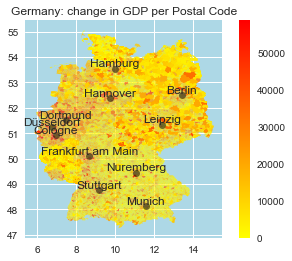

In [14]:
fig, ax = plt.subplots()

germany_df.plot(
    ax=ax, 
    column='einwohner', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
    alpha=0.8
)

for c in top_cities.keys():

    ax.text(
        x=top_cities[c][0], 
        y=top_cities[c][1] + 0.08, 
        s=c, 
        fontsize=12,
        ha='center', 
    )

    ax.plot(
        top_cities[c][0], 
        top_cities[c][1], 
        marker='o',
        c='black', 
        alpha=0.5
    )
    
ax.set(
    title='Germany: change in GDP per Postal Code', 
    aspect=1.3, 
    facecolor='lightblue'
);